In [158]:
import pyaudio
import struct
import numpy
import matplotlib.pyplot as plt
from scipy import fftpack
from scipy.spatial import Voronoi, voronoi_plot_2d
import wave

In [159]:
import random

def random_color(as_str=True, alpha=0.5):
    rgb = [random.randint(0,255),
           random.randint(0,255),
           random.randint(0,255)]
    if as_str:
        return "rgba"+str(tuple(rgb+[alpha]))
    else:
        return list(numpy.array(rgb)/255) + [alpha]

In [160]:
stream = wave.open('gershwin.wav', mode='rb')
CHUNK = stream.getframerate()
maxVals = list()
while stream.tell() != stream.getnframes():
    rawData = stream.readframes(CHUNK)
    data = numpy.frombuffer(rawData, numpy.int16)
    transformed = fftpack.fft(data)

    trimmedData = abs(transformed[0:CHUNK])
    freqRange = fftpack.fftfreq(CHUNK, 1/stream.getframerate())
    freqs = (trimmedData / max(trimmedData) * 256)

    mappedData = dict(zip(freqRange, freqs))

    maxVals.append(abs(max(mappedData, key=mappedData.get)))

stream.getframerate()

44100

In [161]:
xStep = 50
xIdx = xStep
voronoiPoints = list()
for freq in maxVals:
    voronoiPoints.append((xIdx, round(freq)))
    xIdx += xStep

voronoiPoints

[(50, 199),
 (100, 197),
 (150, 165),
 (200, 276),
 (250, 524),
 (300, 522),
 (350, 664),
 (400, 787),
 (450, 117),
 (500, 586),
 (550, 830),
 (600, 830),
 (650, 117),
 (700, 247),
 (750, 233),
 (800, 234),
 (850, 234),
 (900, 414),
 (950, 347),
 (1000, 117),
 (1050, 490),
 (1100, 494),
 (1150, 780),
 (1200, 587),
 (1250, 293),
 (1300, 349),
 (1350, 468),
 (1400, 467),
 (1450, 522),
 (1500, 391),
 (1550, 392),
 (1600, 526),
 (1650, 527),
 (1700, 625),
 (1750, 526),
 (1800, 418),
 (1850, 706),
 (1900, 524),
 (1950, 419),
 (2000, 419),
 (2050, 418),
 (2100, 156),
 (2150, 157),
 (2200, 157),
 (2250, 157),
 (2300, 156),
 (2350, 157),
 (2400, 156),
 (2450, 155),
 (2500, 155),
 (2550, 157),
 (2600, 277),
 (2650, 278),
 (2700, 236),
 (2750, 832),
 (2800, 1686),
 (2850, 157),
 (2900, 743),
 (2950, 233),
 (3000, 554),
 (3050, 157),
 (3100, 209),
 (3150, 157),
 (3200, 235),
 (3250, 329),
 (3300, 233),
 (3350, 184),
 (3400, 207),
 (3450, 207),
 (3500, 207),
 (3550, 493),
 (3600, 174),
 (3650, 157

In [162]:
len(voronoiPoints)

1044

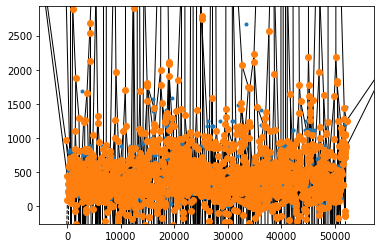

In [163]:
from voronoi_polygons import voronoi_finite_polygons_2d

vor = Voronoi(voronoiPoints)

regions, vertices = voronoi_finite_polygons_2d(vor, radius=max(maxVals)*2)

polygons = []
for reg in regions:
    polygon = vertices[reg]
    polygons.append(polygon)

fig = voronoi_plot_2d(vor)

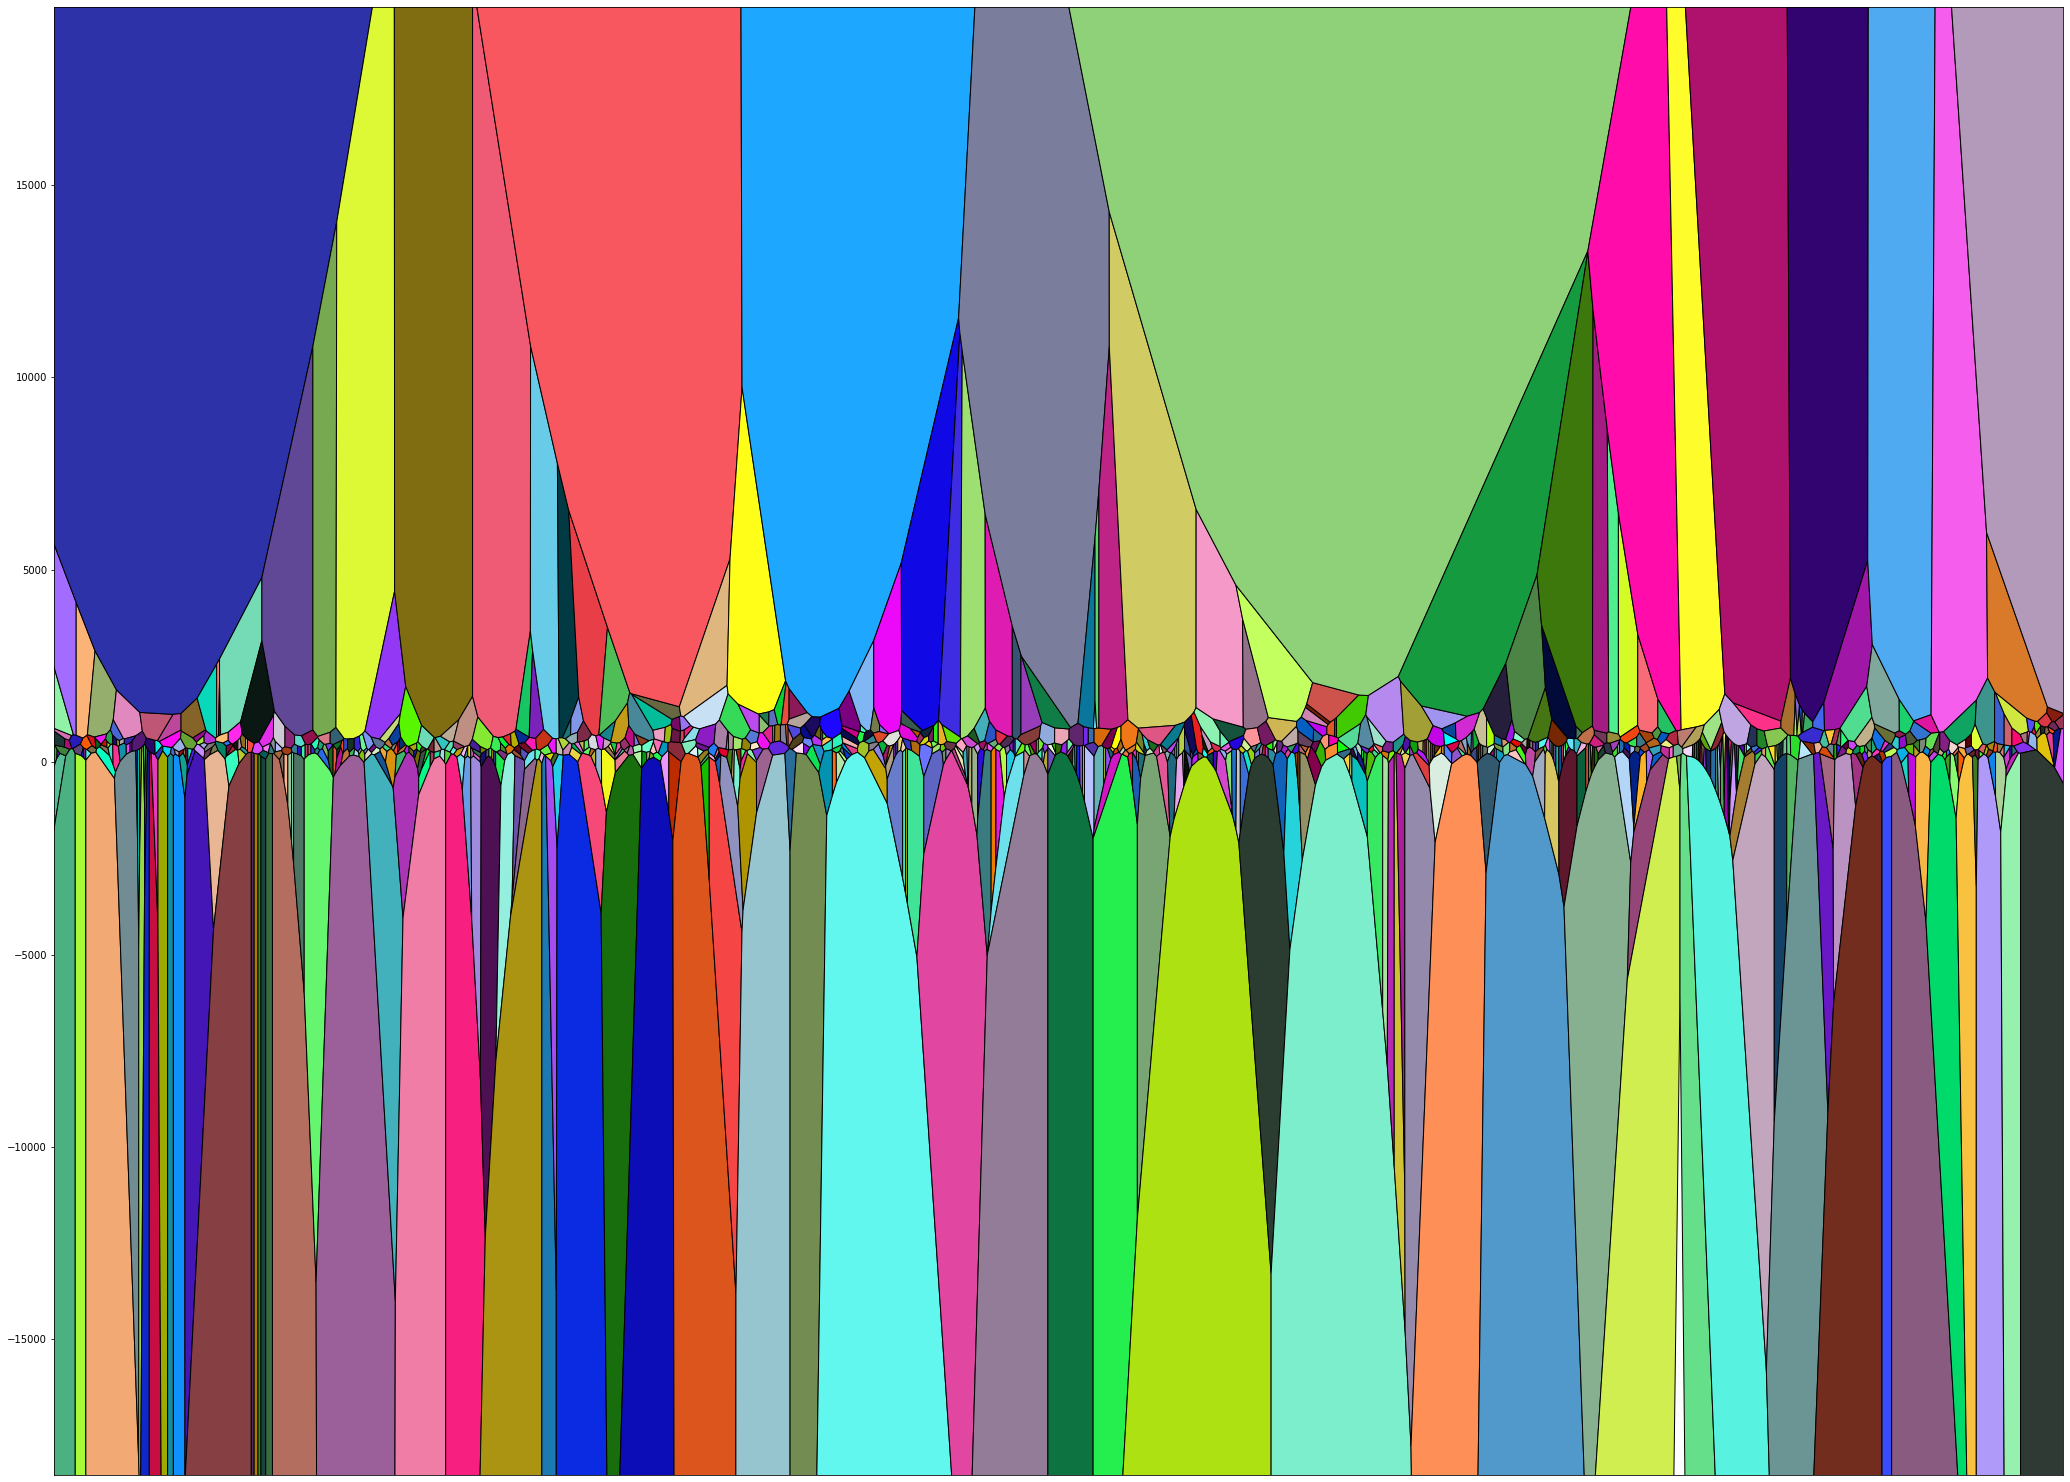

&lt;Figure size 432x288 with 0 Axes&gt;

In [164]:

from matplotlib.patches import Polygon

plt.figure(figsize=(36, 27))
ax = plt.subplot()
ax.tick_params(
    bottom=False, 
    labelbottom=False
)
plt.axis("equal")

for poly in polygons:
        colored_cell = Polygon(poly,
                               facecolor=random_color(as_str=False, alpha=1),
                               edgecolor="black")
        ax.add_patch(colored_cell)

ax.set_xlim(0, xStep*len(voronoiPoints))
ax.set_ylim(100, 1000)
plt.show()
plt.savefig("gallery/gershwin")